# How to connect to an API with Python

# What is an API?
- An API, or Application Programming Interface:
    - is a software to software interface that receives a request and gives a response.
    - is a server that helps you to 
        - retrieve, 
        - send, 
        - update and 
        - delete data. 
    - allows communication between two software, or products or services.
    - When we want to perform these actions we request the API server.
        - takes requests from the user and brings them to the system for some kind of action to be performed.

API makes the connection between the user and the system.
- API is the messenger.

APIs provide a means of communication between programs enabling them to use the other’s functions.

API specifies how software components should interact with each other.

API is a set of protocols, routines, and tools to build applications.

Example:
- Use credentials from one of our social media accounts and use them to log into another website.

# How APIs Work?
APIs connect two systems/software programs
- the server(which runs and provides the unique API ) and 
- the client that 
and exchanges data with the server through the API.

## What are the API request methods?

The python requests library has easy-to-use methods to handle HTTP operations such as GET, POST, PUT, and DELETE against a specific web server specified by its URL.

Supports sending extra information to a web server through 
- parameters and headers, 
- encoding the server responses, 
- detecting errors, and 
- handling redirects.

The Requests library and the urllib Library
- It simplifies how we work with the HTTP operations
- Provides advanced features such as handling HTTP exceptions and authentication.

- The methods of API or CRUD operations that we will be using are:
    - Create -> POST -> Used to create an API resource in the server
    - Read -> GET -> Used to retrieve information about an API from the server
    - Update -> PUT -> Used to update an API information in the server
    - Delete -> DELETE -> Used to delete API information in the server

## What are the status codes returned by the API server?
- 1xx: Informational
    - It means the request is received and the process is continuing.
- 2xx: Success
    - It means the action is successfully received and accepted.
- 3xx: Redirection
    - It means further must be taken to complete the request.
- 4xx: Client Error
    - It means the request contains incorrect syntax or cannot be fulfilled.

# What is HTTP?
HTTP stands for Hyper Text Transfer Protocol. 

It is a request/response protocol based on the client-server architecture that relies on TCP/IP connections to exchange request and response messages.

HTTP clients (web browsers or mobile applications) send requests to the HTTP server, 
- The server responds to them with messages containing:
    - a status line, 
    - a header, and 
    - a body.

### API Jargon
- Create a simple console application that consumes a public API using a HTTP chart.
- create a simple Cleaning program that consumes a HighBond API and Human Capital API using a HTTP/ HTTP URL
- create a simple Currency Converter program that consumes a public Currency API using ...
    - This means I have to get a unique API key from the API websites.
    - proceed to build my console app on my editor.
    - run it on the command prompt.
    - pushing it to GitHub.


# API types

There are mainly four different types of APIs commonly used.
The “type” of the API denotes the intended scope of use.

### Private
Private APIs (or internal APIs) build to use only within an organization to make the connection between the system and data. 

For example, 
- an internal API may link the payroll and HR systems of an organization.

### Partner
Partner APIs are available for specific outside organizations or developers who are selected and authorized to use them. 

For example
- This type of API allows business-to-business activities.

### Public
Public APIs are available to any outside developer or organization. There are no restrictions to use them.

### Composite
These APIs are generated by using two or more APIs to execute a sequence of independent operations. Sometimes composite APIs can improve speed and performance over individual APIs.

# Specifications of APIs
When API exchanges data, it requires: 
- protocols and 
- structures 
To govern these operations.

### Representational state transfer (REST)
Approach to building APIs and offers web-wide standards amongst computer systems which make communication flow easier.

REST is stateless which means it doesn’t store any data or status between requests.

### Service object access protocol (SOAP)
Is lightweight protocol for transmitting structured information in a decentralized, distributed environment.

SOAP APIs are usually 
- used to create web APIs with XML.
- Supports a wide range of communication protocols such as HTTP, SMTP, and TCP.
- Allows developers to add features and functionalities easily because SOAP is extensible and style-independent.

### GraphQL
Query language for APIs

Get the exact data because it offers an absolute and simplified description of the data.
- simpler to evolve APIs over time and sophisticated developer tools are made possible.

### Remote procedural call (RPC)
Protocol is used to send multiple parameters and receive results. 

It invokes executable actions or processes. 

JSON and XML are two programming languages that RPC can use; 
these APIs are referred to as JSON-RPC and XML-RPC,


# Command-Line Apps and APIs

Command Line applications are simple applications that are executed on the terminal (shell, console) using a text interface.
- basically, you type into the shell to execute your application.

Example:
- git is a command-line application

To get started building a command line applications that uses API to consume HTTP verbs you will need:
- A virtual environment of-course (to seclude/separate individual development projects)
- A command-line parsing library like Docopt or Clint.
- An Api library from where to get your Api key from.

## Exercise 1: The libraries:

Step 1: Import all the required libraries to perform the task and then
- requests or
- urllib
- pandas
- matplotlib.pyplot

Step 2: dynamically construct the API URL. 
- The base URL for the API is mentioned on the site.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

api_base_url=r'https://www.bankofcanada.ca/valet'
api_foreign_exchange_from='CAD'
api_foreign_exchange_to='USD'
api_endpoint_query=r'/observations/FX' + api_foreign_exchange_from + api_foreign_exchange_to +'/json?recent_years='

api_recent_years=10

concat_api_url= api_base_url + api_endpoint_query + str(api_recent_years)

In [2]:
concat_api_url

'https://www.bankofcanada.ca/valet/observations/FXCADUSD/json?recent_years=10'

Once constructed the API link, 
- I try the link on the web to make sure it works and produces the JSON file. 

Now pass the `api_url_response` to the API server and check for the `api_url_response.status_code` using an if condition.
- If the `api_url_response.status_code` is not “200” then I print the status code and description for the user to investigate what caused the error status code as mentioned above. 
- If not then get the data from the API server filtered for “observations”.

# Using the requests library

Requests is an open-source, HTTP library that simplifies making HTTP requests to web servers and working with their responses.

- requests library is available on PyPI:

### Installing the requests Library on Mac:
$ python -m pip install requests

In [5]:
api_url_response=requests.get(concat_api_url)

In [6]:
if api_url_response.status_code!=200:
    print("Request returned error code: " + str(api_url_response.status_code))
    print("Request returned error description: " + api_url_response.json()['message'])
    
else:
    api_json_data = api_url_response.json()['observations']
    
    exchange_date=[]
    exchange_value=[]

Then creating two lists to store the exchange date and value.
- Running a loop on `api_json_data` to extract the date and append it to the empty list. 

Following the same process for extracting the value with some modification to the code and making it dynamic for future use.

In [9]:
for exc_date in api_json_data:
    temp_date=exc_date['d']
    exchange_date.append(temp_date)
    
for exc_val in api_json_data:
    temp_series= eval("'FX" + api_foreign_exchange_from +api_foreign_exchange_to + "'")
    temp_val=exc_val[temp_series]['v']
    exchange_value.append(temp_val)

In [16]:
data_dict = {'exchange_date' : exchange_date,
             'exchange_value': exchange_value}

In [17]:
df = pd.DataFrame(data_dict, columns= ['exchange_date', 'exchange_value'])

df

,exchange_date,exchange_value
0,2017-01-03,0.7443
1,2017-01-04,0.7510
2,2017-01-05,0.7551
3,2017-01-06,0.7568
4,2017-01-09,0.7553
...,...,...
1748,2024-01-05,0.7492
1749,2024-01-08,0.7478
1750,2024-01-09,0.7468
1751,2024-01-10,0.7473


- Adding the list data to the newly created dataframe “df_data” and splitting the “Old Exchange Date” to retain only the year. - Converting the “Old Exchange Value” to decimal type. 
- Post which the data is grouped and aggregated with the mean value for analysis.

In [18]:
df_data=pd.DataFrame()
df_grouped=pd.DataFrame()

df_data['Old Exchange Date']=exchange_date
df_data['Old Exchange Value']=exchange_value

df_data['New Exchange Date']=df_data['Old Exchange Date'].str.split('-').str[0]
df_data['New Exchange Value']=df_data['Old Exchange Value'].astype(float)

df_grouped=df_data.groupby('New Exchange Date').agg('mean')

In [19]:
df_grouped

,New Exchange Value
New Exchange Date,
2017,0.770847
2018,0.772119
2019,0.753689
2020,0.746142
2021,0.797978
2022,0.769163
2023,0.741044
2024,0.748175


- On the grouped dataframe “df_grouped” plotting line chart with marker “*”. 
- Then add a dynamic title to the chart, assigning the “x-axis” and “y-axis” labels.

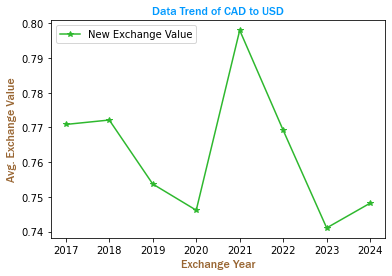

In [20]:
df_grouped.plot.line(marker = '*',color='#2eb82e')
plt.title("Data Trend of "+ api_foreign_exchange_from + " to "+api_foreign_exchange_to,c='#0099ff',fontname='Franklin Gothic Medium')
plt.xlabel("Exchange Year",c='#996633',fontname='Franklin Gothic Medium',fontsize=12)
plt.ylabel("Avg. Exchange Value",c='#996633',fontname='Franklin Gothic Medium',fontsize=12)
plt.show()

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

api_base_url=r'https://www.bankofcanada.ca/valet'
api_foreign_exchange_from='CAD'
api_foreign_exchange_to='USD'
api_endpoint_query=r'/observations/FX' + api_foreign_exchange_from + \
                    api_foreign_exchange_to +'/json?recent_years='
api_recent_years=10

concat_api_url= api_base_url + api_endpoint_query + str(api_recent_years)
api_url_response=requests.get(concat_api_url)

if api_url_response.status_code!=200:
    print("Request returned error code: " + str(api_url_response.status_code))
    print("Request returned error description: " + api_url_response.json()['message'])
    
else:
    api_json_data=api_url_response.json()['observations']
    
    exchange_date=[]
    exchange_value=[]
    
    for exc_date in api_json_data:
        temp_date=exc_date['d']
        exchange_date.append(temp_date)
    
    for exc_val in api_json_data:
        temp_series=eval("'FX" + api_foreign_exchange_from +api_foreign_exchange_to + "'")
        temp_val=exc_val[temp_series]['v']
        exchange_value.append(temp_val)
        
    df_data=pd.DataFrame()
    df_grouped=pd.DataFrame()
    
    df_data['Old Exchange Date']=exchange_date
    df_data['Old Exchange Value']=exchange_value
    
    df_data['New Exchange Date']=df_data['Old Exchange Date'].str.split('-').str[0]
    df_data['New Exchange Value']=df_data['Old Exchange Value'].astype(float)
    
    df_grouped=df_data.groupby('New Exchange Date').agg('mean')
    
    df_grouped.plot.line(marker = '*',color='#2eb82e')
    plt.title("Data Trend of "+ api_foreign_exchange_from + " to "+api_foreign_exchange_to,c='#0099ff',fontname='Franklin Gothic Medium')
    plt.xlabel("Exchange Year",c='#996633',fontname='Franklin Gothic Medium',fontsize=12)
    plt.ylabel("Avg. Exchange Value",c='#996633',fontname='Franklin Gothic Medium',fontsize=12)
    plt.show()

# Python API Tutorial

Explore how to retrieve data for AI and data science projects using APIs (Application Programming Interfaces). 
APIs play an increasingly crucial role in the age of artificial intelligence and data science by providing access to vast amounts of data.

### How APIs Benefit AI and Data Science Projects
To use an API, you make a request to a remote web server and retrieve the data you need.

### Several key benefits
- Real-time data access: APIs allow you to retrieve up-to-date data on demand, which is crucial for AI models and data science projects that require real-time data to make accurate predictions or decisions.
- Large datasets: Training AI models often requires large amounts of data. APIs provide a way to access and integrate data from multiple sources without the need for local storage and management.
- Pre-processed data: Some APIs offer pre-processed or enriched data, such as sentiment analysis or entity recognition, saving significant time and resources in AI projects.

### When to Use APIs Instead of Static Datasets
- Rapidly changing data: 
    - For data that changes quickly, like stock prices, using an API is more efficient than repeatedly downloading a static dataset.
- Specific subsets of data: 
    - If you only need a small piece of a larger dataset, such as your own comments on Reddit, an API allows you to retrieve just the relevant data.
- Complex computations: 
    - APIs like Spotify's can provide information like music genres, leveraging their extensive data and computational resources.

### Mastering API integration will allow you to:

- Access large datasets to train and improve AI models
- Incorporate AI-powered services into your projects
- Retrieve real-time data streams for AI applications

In [ ]:
# use pip to manage your Python packages
!pip install requests

# use conda
conda install requests

# Once installed the library, import it.
import requests

## Exercise 1: GET method

GET, the most common type, retrieves data

the response includes a status code that tells us whether the request was successful.

To make a GET request, we use the requests.get() function, passing in the URL we want to request.

In [ ]:
import requests
r = requests.get('https://jsonplaceholder.typicode.com/users')
print('Response Code:', r.status_code)

# if outputs <Response [200]>
# meaning the request is successful and the URL is reachable.

# check the datatype of the r variable
print(type(r))

# API response is in JSON format.

# returns <class 'requests.models.Response'>, which means it’s an instance of Response class. 
# A Response object contains the result of an HTTP request.

# see the headers of the response.
print('Response Headers:\n', r.headers)


#####  Output: Response Headers:
{'Date': 'Tue, 16 Aug 2022 13:17:21 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Powered-By': 'Express', 'X-Ratelimit-Limit': '1000', 'X-Ratelimit-Remaining': '999', 'X-Ratelimit-Reset': '1658609131', 'Vary': 'Origin, Accept-Encoding', 'Access-Control-Allow-Credentials': 'true', 'Cache-Control': 'max-age=43200', 'Pragma': 'no-cache', 'Expires': '-1', 'X-Content-Type-Options': 'nosniff', 'Etag': 'W/"160d-1eMSsxeJRfnVLRBmYJSbCiJZ1qQ"', 'Content-Encoding': 'gzip', 'Via': '1.1 vegur', 'CF-Cache-Status': 'HIT', 'Age': '26626', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Report-To': '{"endpoints":[{"url":"https:\\/\\/a.nel.cloudflare.com\\/report\\/v3?s=hU%2ByipMaAPTN%2B0CMablfEX8zpzKx%2BUzGewBeix4suppgOFZjYd2sa6Mh2WhLQQs755Hx6XiPgVXAb5Nz%2FqIqVVQ5jxejGXnBdcKzOoUZ%2FLYw4XQP34oRG2tcApgjxYaUBUiPpWJrbhg3%2B%2BFvPQmx"}],"group":"cf-nel","max_age":604800}', 'NEL': '{"success_fraction":0,"report_to":"cf-nel","max_age":604800}', 'Server': 'cloudflare', 'CF-RAY': '73ba732238a57437-LHR', 'alt-svc': 'h3=":443"; ma=86400, h3-29=":443"; ma=86400'}

### HTTP Headers
HTTP headers let the client and the server pass additional information with an HTTP request or response.

HTTP header consists of its case-insensitive name followed by a colon (:), then by its value. 
- Whitespace before the value is ignored.

In [ ]:
# see the response of the body.
# use the response.json() method to view the data
r.json()[0]

# pass parameters to HTTP requests like below:
import requests

payload = {'id': 1, 'username': 'Bret'}
res = requests.get('https://jsonplaceholder.typicode.com/users',params = payload)
print(res.json())

## Exercise 2: POST method

In [ ]:
res = requests.post('https://jsonplaceholder.typicode.com/users', data = {'id':'100', 'username':'Sunil Kumar'})
print('Response Code:', r.status_code)
res.json()

## Exercise 3: PUT method

In [ ]:
res = requests.put('https://jsonplaceholder.typicode.com/users', data ={'id':'100', 'username':'Sunil Kumar'})
print('Response Code:', r.status_code)

## Exercise 4:  API with Query Parameters

API endpoints commonly require us to specify parameters.
Query parameters allow us to customize the behavior of AI models, access specific subsets of data,

Query Parameters Relate to LLMs

LLMs like ChatGPT are trained on extensive datasets to grasp the nuances of human language and generate relevant responses. When you prompt ChatGPT with a question, such as 'Explain the theory of relativity,' it filters through its dataset to find and compile information that aligns with your request. This process is analogous to using query parameters in an API to extract a subset of data from a larger dataset.

### Query Parameters: Like Customizing a Burger Order

Rather than retrieving all the data an API offers, we might want only a subset of that data. 

Optional query parameters allow us to specify or filter the data we want from an API, much like adding specific instructions to our burger order.

To filter data to only include countries in Sub-Saharan Africa, we use a query parameter in the URL.

Example: 
- https://api-server.dataquest.io/economic_data/countries?filter_by=region=Sub-Saharan%20Africa.

World Development Indicators API enables refined searches by supporting these parameters:
/countries, 
/indicators, 
/country_series, 
/series_time, 
/footnotes, and 
/historical-data.

In [ ]:
import requests

response = requests.get("https://api-server.dataquest.io/economic_data/countries") 
data = response.json()

# Data variable now contains a list of all countries in the database.
# If we are specifically interested in countries within a certain region, such as Sub-Saharan Africa, we need to utilize query parameters to refine our request.
# API supports the filter_by parameter, allowing for more targeted searches.

response = requests.get("https://api-server.dataquest.io/economic_data/countries?filter_by=region=Sub-Saharan%20Africa") 
data = response.json()


### Explaining URL

-  filter_by=region=Sub-Saharan%20Africa

Meaning:

- ? is a delimiter that marks the beginning of the query string. It separates the path of the URL from the parameters that are being passed.
- filter_by indicates the type of filtering we are applying.
- region is a specific field in the API's database that we want to filter by. In this context, region refers to the geographical area of the countries.
- The first = sign following filter_by is used to assign the filtering criteria (region in this case), and the second = sign assigns the specific value (Sub-Saharan Africa) to the region field.
- %20 is URL encoding for a space character, necessary because URLs cannot contain actual space characters. However, when composing a GET request in an editor or a tool, you don't need to manually type %20 for spaces; it is typically handled automatically by the software.

# Request Handling Exceptions

Exceptions may occur while communicating with a remote server.

## Examples:
- the server can be unreachable
- the requested URL doesn’t exist on the server
- the server doesn’t respond in a proper timeframe

## Check for the following:
response.raise_for_status() or response.status_code before parsing JSON
- The successful call to response.json() does not indicate the success of the request.

In [ ]:
res.raise_for_status()

res.status_code

## Example 1: HTTP 500 error

some servers may return a JSON object in a failed response (e.g., error details with HTTP 500)

Solution:
- execute response.json() after check response.raise_for_status() or check response.status_code.

In [ ]:
import requests
from requests import HTTPError
url = "https://jsonplaceholder.typicode.com/users/status/404"
try:
    r = requests.get(url)
    r.raise_for_status()
    print('Response Code:', r.status_code)
    print(res.json()
          
except HTTPError as ex:
    print(ex)


# Output: 404 Client Error: Not Found for url: https://jsonplaceholder.typicode.com/users/status/404

## Example 2: Timeout

In [ ]:
import requests
from requests import HTTPError
from requests import Timeout
url = "https://jsonplaceholder.typicode.com/users/delay/3"
try:
    r = requests.get(url, timeout=3)
    print('Response Code:', r.status_code)
except HTTPError as ex:
    print(ex)
except Timeout as ex:
    print(ex)


# Output: HTTPConnectionPool(host='httpbin.org', port=80): Read timed out. (read timeout=3)

## Example 3: Authenticated request

Use auth parameter to perform the authenticated request. There is a popular form of HTTP Authentication is Digest Authentication, and Requests supports.


In [ ]:
import requests
from requests.auth import HTTPDigestAuth
r = requests.get('https://httpbin.org/digest-auth/auth/user/pass', auth=HTTPDigestAuth('user', 'pass'))
print('Response Code:', r.status_code)
print('Response Content:\n', r.text)

# Output: Response Code: 200
# Response Content: {"authenticated": true,  "user": "data"}

# Using the urllib Library

Make 
- HTTP requests, 
- read server responses, and 
- handle errors using Python’s urllib library.

The urllib library is a powerful, built-in tool for working with URLs and making HTTP requests.

Focusing on the urllib.request module

## Exercise 1: Importing the urllib.request module

In [ ]:
import urllib.request

## Exercise 2: GET request

Use the urlopen function from the urllib.request module

The urlopen function returns an HTTPResponse object containing the server's response.

In [ ]:
url = 'https://example.com'
response = urllib.request.urlopen(url)

## Exercise 3: Reading the response content

Content is returned as bytes.

To convert the content to a string, use the decode method

In [ ]:
content = response.read()

## Exercise 4: Convert the content to a string

content = content.decode('utf-8')

## Exercise 5: Full URL code

In [ ]:
req = urllib.request.Request(URL)
req.add_header('Authorization', 'Bearer ' + token

with urllib.request.urlopen(req) as response:
    html_response = response.read()
    encoding = response.headers.get_content_charset('utf-8')
    decoded_html = html_response.decode(encoding)
    text = get_text(decoded_html)

jsn_rid = json.loads(text, strict=False)
df_rid = pd.json_normalize(jsn_rid, 'data')

#  Remove NAN Values.
df_rid.fillna('', inplace=True)

## Exercise 6: Handling exceptions

To handle exceptions:
- Network issues 
- invalid URLs

Tse the urllib.error module, which provides two common exception classes: 
- URLError
- HTTPError - HTTPError is a subclass of URLError and offers more specific information about HTTP-related errors.

In [ ]:
import urllib.request
import urllib.error

url = 'https://example.com'

try:
    response = urllib.request.urlopen(url)
    
    content = response.read()
    content = content.decode('utf-8')
    
    print(content)

except urllib.error.HTTPError as e:
    print(f"HTTP Error: {e.code} {e.reason}")

except urllib.error.URLError as e:
    print(f"URL Error: {e.reason}")